<a href="https://colab.research.google.com/github/rafaellabastos/savvyfix-ia-notebook/blob/main/precificacao_dinamica.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **SavvyFix - Precificação dinâmica**

<p>2TDSPF</p>

<p>Douglas Magalhães de Araujo - 552008</p>
<p>Erik Yuuzo Kobayachi Yamada - 98027</p>
<p>Gustavo Argüello Bertacci - 551304</p>
<p>Luiz Fillipe Farias - 99519</p>
<p>Rafaella Monique do Carmo Bastos - 552425</p>

# **Dataset**

<p>Dataset presente na raíz do repositório no Github com o nome "datasetIA.xlsx" ou no link: https://docs.google.com/spreadsheets/d/1gtDX6f2rMFc6DH8Rad0Lq-MZ4yDYK8T2/edit?usp=drive_link&ouid=102116052499151495625&rtpof=true&sd=true</p>

<br>

## Descrição da base de dados utilizada
<p>A base de dados utilizada diz respeito às informações coletadas por meio dos cookies sobre as informações de cada cliente, sejam informações fixas (nome e produto), sobre seu atual estado (localização, horário e clima) ou informações sobre a utilização do site (procura e demanda).</p>
<br>
<p><b>1.  Nome:</b> a coluna “Nome” indica o nome completo do usuário que está cadastrado no sistema.</p>
<p><b>2. Produto:</b> a coluna “Produto” indica o nome do produto vendido no site que será utilizado para determinar o preço dinâmico para determinado usuário.</p>
<p><b>3. Localização:</b> a coluna “Localização” indica o estado que o usuário está quando ele visitou o site no formato de siglas.</p>
<p><b>4. Horário:</b> a coluna “Horário” indica o horário no momento que o usuário entrou no site no formato hh:mm.</p>
<p><b>5. Clima:</b> a coluna “Clima” indica o clima no momento que o usuário entrou no site no formato de número.</p>
<p><b>6. Procura:</b> a coluna “Procura” indica a quantidade de vezes que o usuário procurou por aquele produto em um dia.</p>
<p><b>7. Demanda:</b> a coluna “Demanda” indica se, no geral, um produto está com procura alta, média ou baixa.</p>


## **Protótipo Funcional**

In [ ]:
import pandas as pd

# Carregando o dataset
df = pd.read_excel('datasetIA.xlsx', sheet_name='Planilha1')

# Corrigindo o nome da coluna com espaço extra
df.columns = df.columns.str.strip()

# Definindo as porcentagens de acordo com cada critério
porcentagem_localizacao = {
    'RS': 0.02, 'SC': 0.02, 'PR': 0.01, 'SP': 0.02, 'RJ': 0.02, 'ES': 0,
    'MG': 0, 'MT': -0.01, 'MS': -0.01, 'GO': -0.01, 'AM': -0.02, 'AC': -0.02,
    'RO': -0.02, 'RR': -0.02, 'AP': -0.02, 'PA': 0, 'TO': -0.01, 'MA': 0,
    'PI': -0.01, 'BA': 0.02, 'CE': 0.01, 'RN': -0.01, 'SE': -0.02, 'AL': 0,
    'PE': 0.01, 'PB': -0.02
}

porcentagem_horario = {
    '00h-00h59': -0.01, '01h-01h59': -0.02, '02h-02h59': -0.02, '03h-03h59': -0.02,
    '04h-04h59': -0.02, '05h-05h59': -0.01, '06h-06h59': -0.01, '07h-07h59': 0,
    '08h-08h59': 0, '09h-09h59': 0.01, '10h-10h59': 0.01, '11h-11h59': 0.02,
    '12h-12h59': 0.02, '13h-13h59': 0.01, '14h-14h59': 0.01, '15h-15h59': 0,
    '16h-16h59': 0, '17h-17h59': 0, '18h-18h59': 0.01, '19h-19h59': 0.01,
    '20h-20h59': 0.02, '21h-21h59': 0.01, '22h-22h59': 0, '23h-23h59': 0
}

porcentagem_clima = {
    '1º a 5º': 0.01, '6º a 10º': 0.02, '11º a 15º': -0.02, '16º a 19º': -0.01,
    '20º a 23º': 0, '24º a 26º': 0, '27º a 29º': 0.01, '30º a 34º': 0.01,
    '35º a 39º': 0.02, '+40º': 0.02
}

porcentagem_procura = {
    '1x': 0, '2 a 3x': 0.003, '4 a 7x': 0.008, '8 a 13x': 0, '14 a 17x': -0.002,
    '17 a 20x': 0.001, '+21x': 0
}

porcentagem_demanda = {
    'Alta': 0.02, 'Média': 0, 'Baixa': -0.01
}

# Criação de uma função para aplicar as porcentagens no preço
def calcular_variacao(row):
    try:
        # Definindo um preço inicial fictício, que seria o número 100
        preco_base = 100

        # Calculando as variações baseadas em Localização, Horário, Clima, Procura, e Demanda
        variacao_localizacao = porcentagem_localizacao.get(row['Localização'], 0)

        # Ajustando o horário para o formato correto
        horario = str(row['Horário'])
        hora = int(horario[:2])

        # Determinando a faixa horária
        if 0 <= hora < 1:
            faixa_horaria = '00h-00h59'
        elif 1 <= hora < 2:
            faixa_horaria = '01h-01h59'
        elif 2 <= hora < 3:
            faixa_horaria = '02h-02h59'
        elif 3 <= hora < 4:
            faixa_horaria = '03h-03h59'
        elif 4 <= hora < 5:
            faixa_horaria = '04h-04h59'
        elif 5 <= hora < 6:
            faixa_horaria = '05h-05h59'
        elif 6 <= hora < 7:
            faixa_horaria = '06h-06h59'
        elif 7 <= hora < 8:
            faixa_horaria = '07h-07h59'
        elif 8 <= hora < 9:
            faixa_horaria = '08h-08h59'
        elif 9 <= hora < 10:
            faixa_horaria = '09h-09h59'
        elif 10 <= hora < 11:
            faixa_horaria = '10h-10h59'
        elif 11 <= hora < 12:
            faixa_horaria = '11h-11h59'
        elif 12 <= hora < 13:
            faixa_horaria = '12h-12h59'
        elif 13 <= hora < 14:
            faixa_horaria = '13h-13h59'
        elif 14 <= hora < 15:
            faixa_horaria = '14h-14h59'
        elif 15 <= hora < 16:
            faixa_horaria = '15h-15h59'
        elif 16 <= hora < 17:
            faixa_horaria = '16h-16h59'
        elif 17 <= hora < 18:
            faixa_horaria = '17h-17h59'
        elif 18 <= hora < 19:
            faixa_horaria = '18h-18h59'
        elif 19 <= hora < 20:
            faixa_horaria = '19h-19h59'
        elif 20 <= hora < 21:
            faixa_horaria = '20h-20h59'
        elif 21 <= hora < 22:
            faixa_horaria = '21h-21h59'
        elif 22 <= hora < 23:
            faixa_horaria = '22h-22h59'
        else:
            faixa_horaria = '23h-23h59'

        variacao_horario = porcentagem_horario.get(faixa_horaria, 0)

        # Calculando a variação de clima
        clima = row['Clima']
        variacao_clima = 0
        for faixa, variacao in porcentagem_clima.items():
            if faixa.startswith('+') or faixa.startswith('-'):
                limites = faixa.split('º a ')
                if len(limites) == 2:
                    limite_inferior = int(limites[0].replace('º', ''))
                    limite_superior = int(limites[1].replace('º', ''))
                    if limite_inferior <= clima <= limite_superior:
                        variacao_clima = variacao
                        break
                else:
                    limite_inferior = int(limites[0].replace('+', '').replace('º', ''))
                    if clima >= limite_inferior:
                        variacao_clima = variacao
                        break
            else:
                if faixa == f'{clima}':
                    variacao_clima = variacao
                    break

        variacao_procura = porcentagem_procura.get(row['Procura'], 0)
        variacao_demanda = porcentagem_demanda.get(row['Demanda'], 0)

        # Calculando o novo preço com base nas variações
        preco_final = preco_base * (1 + variacao_localizacao + variacao_horario +
                                    variacao_clima + variacao_procura + variacao_demanda)

        return preco_final
    except Exception as e:
        print(f"Erro ao processar a linha: {row}. Erro: {e}")
        return None

# Aplicando a função ao dataset
df['Preço Final'] = df.apply(calcular_variacao, axis=1)

# Verificando se tem algum problema na atribuição dos dados
print(df[['Nome', 'Produto', 'Localização', 'Horário', 'Clima', 'Procura', 'Demanda', 'Preço Final']].head())


Erro ao processar a linha: Nome           Ana Clara Silva
Produto                  Kappa
Localização                 TO
Horário               07:38:00
Clima                      -14
Procura                   27.0
Demanda                  Média
Name: 0, dtype: object. Erro: '>=' not supported between instances of 'str' and 'int'
Erro ao processar a linha: Nome           João Vitor Almeida
Produto                 Havaianas
Localização                    SP
Horário                  05:50:00
Clima                         -12
Procura                      17.0
Demanda                     Média
Name: 3, dtype: object. Erro: '>=' not supported between instances of 'str' and 'int'
Erro ao processar a linha: Nome           Fernanda Almeida Rocha
Produto                      Converse
Localização                        AP
Horário                      15:33:00
Clima                             -10
Procura                          12.0
Demanda                         Média
Name: 8, dtype: object. Er

<ipython-input-5-0ef09e474728>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Localização", y="Preço Final", data=df, palette="coolwarm")


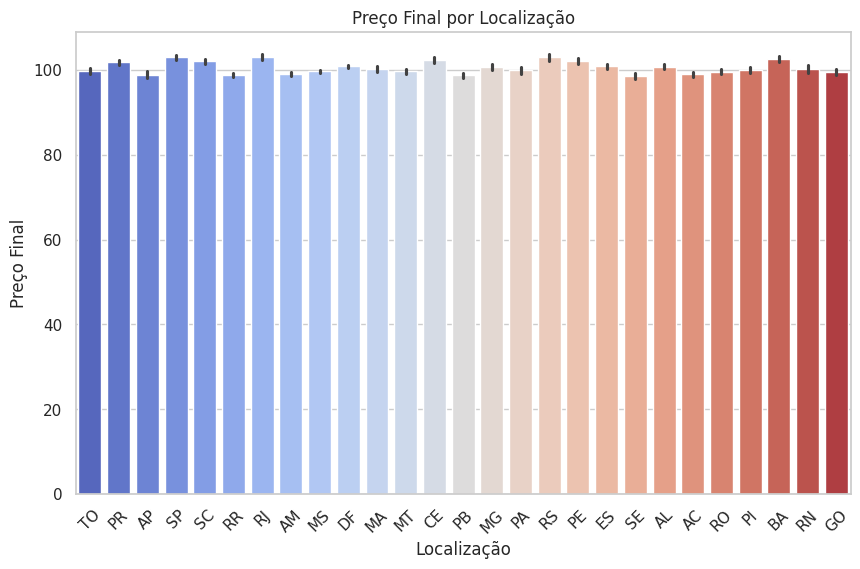

TypeError: 'value' must be an instance of str or bytes, not a int

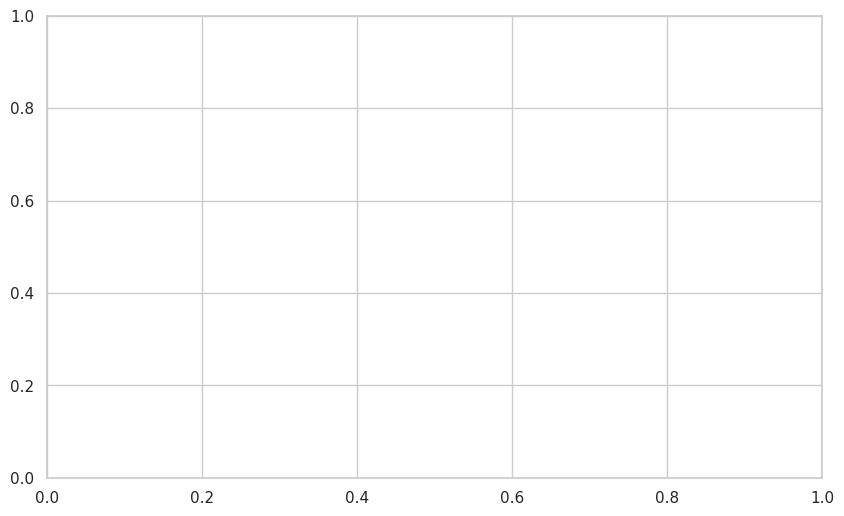

In [ ]:
# GRÁFICOS DE ANÁLISE #

import matplotlib.pyplot as plt
import seaborn as sns

# Configurando para gráficos mais bonitos
sns.set(style="whitegrid")

# Gráfico de Barras: Preço Final por Localização
plt.figure(figsize=(10, 6))
sns.barplot(x="Localização", y="Preço Final", data=df, palette="coolwarm")
plt.title("Preço Final por Localização")
plt.xticks(rotation=45)
plt.show()

# Gráfico de Dispersão: Clima vs Preço Final
plt.figure(figsize=(10, 6))
sns.scatterplot(x="Clima", y="Preço Final", hue="Demanda", data=df, palette="Set1")
plt.title("Clima vs Preço Final (com Demanda)")
plt.show()

# Boxplot: Preço Final por Nível de Demanda
plt.figure(figsize=(10, 6))
sns.boxplot(x="Demanda", y="Preço Final", data=df, palette="pastel")
plt.title("Distribuição do Preço Final por Demanda")
plt.show()
